In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

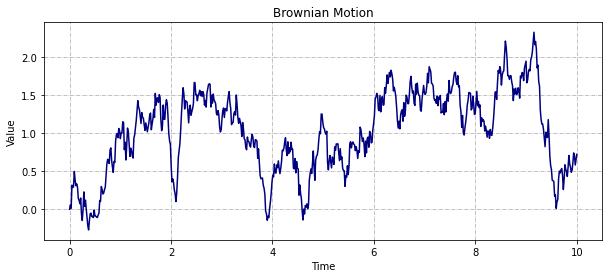

In [2]:
# Q1
t=10
N=64
np.random.seed(5)
count=0
a=np.random.normal(0,1,t*N)
ans=np.zeros(t*N)
for i in range(1,t*N):
    ans[i]=ans[i-1]+a[i-1]
for i in range(0,t*N):
    ans[i]=ans[i]/8

x_axis=np.linspace(0,10,t*N)
plt.figure(figsize=(10,4))
plt.plot(x_axis,ans,color='navy')
plt.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.6,alpha = 0.8)  
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Brownian Motion')
plt.show()

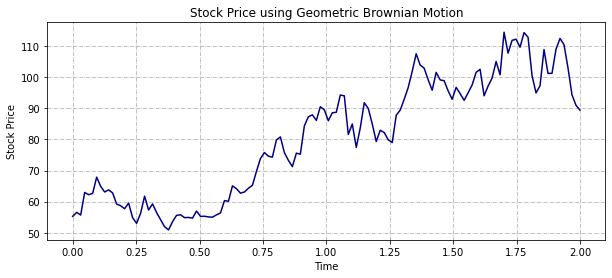

In [3]:
# Q2
t=2
N=64
s0=55.25
mu=0.15
sigma=0.4
s=np.zeros(t*N)
x_axis=np.linspace(0,t,t*N)
for i in range(t*N):
    s[i]=s0*math.exp((mu-sigma*sigma/2)*x_axis[i] + sigma*ans[i])

plt.figure(figsize=(10,4))
plt.plot(x_axis,s,color='navy')
plt.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.6,alpha = 0.8) 
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price using Geometric Brownian Motion')
plt.show()

* In this plot we only plot the random part of the above stock price simulation - e^(W(t)). The plot below has no deterministic part and actual reveals the values that we get from GBM.
*  For stock price we just scale this plot with the appropriate factor as can be seen in the plot in the previous cell.


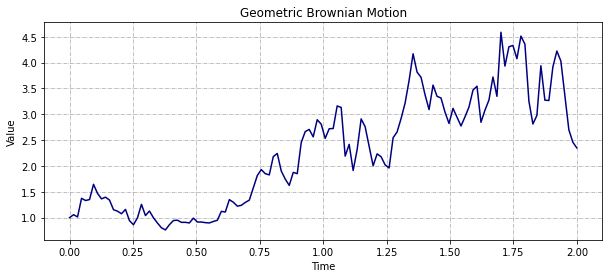

In [15]:
x_axis=np.linspace(0,t,t*N)
plt.figure(figsize=(10,4))
plt.plot(x_axis,np.exp(ans[0:2*N]),color='navy')
plt.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.6,alpha = 0.8)  
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Geometric Brownian Motion')
plt.show()

* In question 3 the entire dataset has been taken.
* Since there are 2511 datapoints thus we are assuming data spread over 2511/365 years. Although the data is of 11 years we are assuming this to take care of the missing data.
* Thus N=365 and T=2511/365 for this question
* Our unit of time is in years and day wise observation have been considered. Hence tau is 1/365.

In [4]:
# Q3A
df=pd.read_csv('REL.csv')
close_price=df['Close Price']
arr =  close_price.tolist()
arr.reverse()
mean=0
std=0
t=2511/365
N=365

for i in range(len(arr)-1):
    mean=mean+(arr[i+1]-arr[i])/arr[i]
mean=mean/(len(arr)-1)
mean = mean*N

mu_i=[np.log(arr[i+1]/arr[i]) for i in range(0,len(arr)-1)]
mu_bar=np.mean(mu_i)

for i in range(1,len(mu_i)):
    std=std+(mu_bar-mu_i[i])*(mu_bar-mu_i[i])

std=std/(len(arr)-2)
std=np.sqrt(std)
std=std/np.sqrt(1/365)

print("Mean Value is : "+ str(mean))
print("Sigma is : " + str(std))

Mean Value is : 0.18703044752585837
Sigma is : 0.43565125540124905


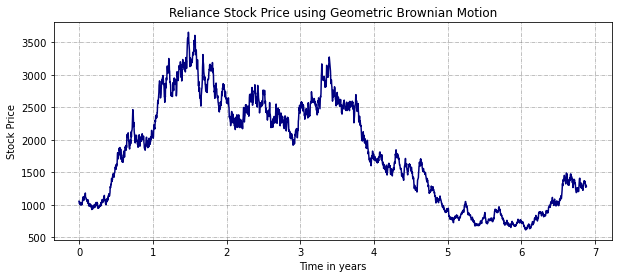

In [5]:
# Q3B
np.random.seed(22)
a=np.random.normal(0,1,int(t*N))
x_axis=np.linspace(0,t,int(t*N))
ans=np.zeros(int(t*N))
s0=arr[0]
mu=mean
sigma=std
s=np.zeros(int(t*N))

for i in range(1,int(t*N)):
    ans[i]=ans[i-1]+a[i-1]
for i in range(0,int(t*N)):
    ans[i]=ans[i]/np.sqrt(N)
for i in range(int(t*N)):
    s[i]=s0*math.exp((mu-sigma*sigma/2)*x_axis[i] + sigma*ans[i])

plt.figure(figsize=(10,4))
plt.plot(x_axis,s,color='navy')
plt.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.6,alpha = 0.8) 
plt.xlabel('Time in years')
plt.ylabel('Stock Price')
plt.title('Reliance Stock Price using Geometric Brownian Motion')
plt.show()